# Importing the Essential Libraries, Metrics

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier




# Loading the Data

In [24]:
df = pd.read_csv("../input/mobile-price-classification/train.csv")

# Exploratory Data Analysis

***Taking a look at the first 5 rows of the dataset***

In [25]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


***Checking the shape—i.e. size—of the data***

In [26]:
df.shape

(2000, 21)

***Learning the dtypes of columns' and how many non-null values are there in those columns***

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Getting the statistical summary of dataset

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


***Visualizing the correlations between numerical variables***

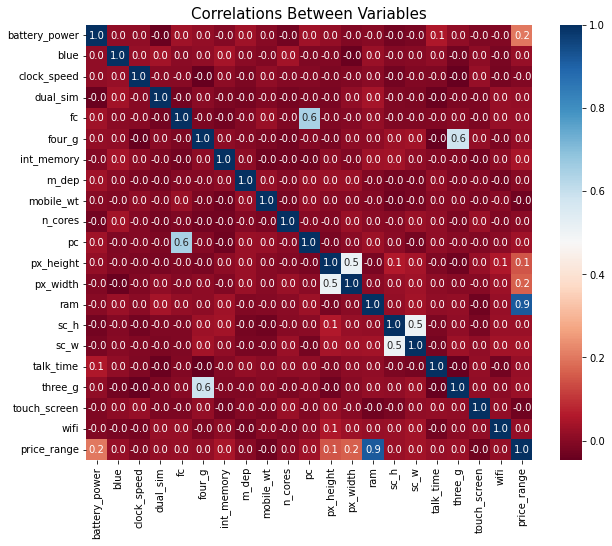

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu",annot=True, fmt=".1f")
plt.title("Correlations Between Variables", size=15)
plt.show();

***Feature Selection***

In [30]:
important_num_cols = list(df.corr()["price_range"][(df.corr()["price_range"]>0.50) | (df.corr()["price_range"]<-0.50)].index)
cat_cols = ["blue", "dual_sim","four_g","three_g","touch_screen","wifi","n_cores"]
important_cols = important_num_cols + cat_cols

df = df[important_cols]

In [31]:
df

,ram,price_range,blue,dual_sim,four_g,three_g,touch_screen,wifi,n_cores
0,2549,1,0,0,0,0,0,1,2
1,2631,2,1,1,1,1,1,0,3
2,2603,2,1,1,1,1,1,0,5
3,2769,2,1,0,0,1,0,0,6
4,1411,1,1,0,1,1,1,0,2
...,...,...,...,...,...,...,...,...,...
1995,668,0,1,1,1,1,1,0,6
1996,2032,2,1,1,0,1,1,1,4
1997,3057,3,0,1,1,1,1,0,8
1998,869,0,0,0,1,1,1,1,5


In [32]:
important_num_cols

['ram', 'price_range']

***Checking for the missing values***

In [33]:
print("Missing Values by Column")
print(df.isna().sum())
print("-"*30)
print("TOTAL MISSING VALUES:",df.isna().sum().sum())

Missing Values by Column
ram             0
price_range     0
blue            0
dual_sim        0
four_g          0
three_g         0
touch_screen    0
wifi            0
n_cores         0
dtype: int64
------------------------------
TOTAL MISSING VALUES: 0


***Checking for the duplicated values***

In [34]:
df.duplicated().sum()

0

# Data Visualization

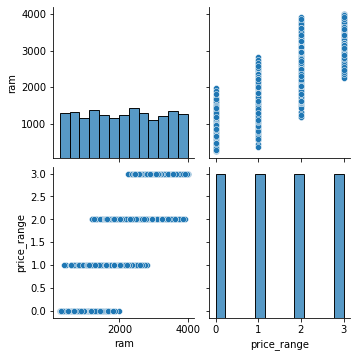

In [35]:
sns.pairplot(df[important_num_cols]);

***Visualizing the Correlation between each column and the target variable using jointplot visualization***

# X, y Split

***Splitting the data into X and y chunks***

In [36]:
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Train-Test Split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
X_train.shape

(1500, 8)

In [39]:
X_test.shape

(500, 8)

# Standardizing the Data

In [40]:
label = LabelEncoder()

In [41]:
y_train =  label.fit_transform(y_train)
y_test = label.transform(y_test)

# Machine Learning Models

# Logistic Regression

In [42]:
loj_model = LogisticRegression(solver="liblinear").fit(X_train,y_train)
y_pred = loj_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.728

# KNN

In [43]:
knn_model = KNeighborsClassifier().fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.732

## Model Tuning

In [44]:
knn = KNeighborsClassifier()
knn_params = {"n_neighbors": np.arange(1,50)}
knn_cv_model = GridSearchCV(knn,knn_params, cv=10).fit(X_train,y_train)
print("Best Score: ",knn_cv_model.best_score_)
print("Best Params: ",knn_cv_model.best_params_)

Best Score:  0.7566666666666667
Best Params:  {'n_neighbors': 31}


In [45]:
knn_tuned =  KNeighborsClassifier(n_neighbors=31).fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred))

Accuracy Score: 0.732
